In [1]:
import pandas as pd
import scanpy as sc
import scipy
import anndata
import scirpy as ir

# BCC Data

Download files here
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE123813 and save to '../data/BCC/'

This script saves the following files:
- bcc_scRNA_counts.pkl: Just a pickled version of raw scRNA data for faster loading
- bcc_tcr_raw.pkl: pd.DataFrame of tcr metadata + split TCR sequences
- bcc_tcr_scirpy.h5ad: annData of TCR data in scirpy format without gene expression
- bcc_tcr_and_gene.h5ad: Joint annData of TCR and gene expression data

## Gene Expression Data

In [ ]:
bcc_all_metadata = pd.read_csv('../data/BCC/bcc_all_metadata.txt', sep='\t', index_col=0)
bcc_all_metadata.head()

In [ ]:
bcc_all_metadata = pd.read_csv('../data/BCC/bcc_all_metadata.txt', sep='\t', index_col=0)
bcc_all_metadata

# Uncomment the cell during for first use

In [4]:
# Very slow (takes about 30min), so save as pickle for future use
# bcc_scRNA_counts = pd.read_pickle('../data/BCC/bcc_scRNA_counts.txt', sep='\t')
# bcc_scRNA_counts.to_pickle('../data/BCC/bcc_scRNA_counts.pkl')

In [5]:
bcc_scRNA_counts = pd.read_pickle('../data/BCC/bcc_scRNA_counts.pkl')
bcc_scRNA_counts

,bcc.su001.pre.tcell_AAACCTGCAGATCGGA,bcc.su001.pre.tcell_AAACCTGCAGGGATTG,bcc.su001.pre.tcell_AAACGGGCATAGACTC,bcc.su001.pre.tcell_AAACGGGTCATACGGT,bcc.su001.pre.tcell_AAACGGGTCATAGCAC,bcc.su001.pre.tcell_AAACGGGTCTTGGGTA,bcc.su001.pre.tcell_AAAGATGAGACAGGCT,bcc.su001.pre.tcell_AAAGATGCACAAGCCC,bcc.su001.pre.tcell_AAAGATGGTTTGGGCC,bcc.su001.pre.tcell_AAAGATGTCTGAGTGT,...,bcc.su012.post.tcell_TTTACTGGTCGGGTCT,bcc.su012.post.tcell_TTTACTGTCTTGCCGT,bcc.su012.post.tcell_TTTATGCAGCTAGCCC,bcc.su012.post.tcell_TTTATGCAGGCAGTCA,bcc.su012.post.tcell_TTTATGCCATATGGTC,bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,bcc.su012.post.tcell_TTTGTCAAGCACCGTC,bcc.su012.post.tcell_TTTGTCAAGTGAACGC,bcc.su012.post.tcell_TTTGTCAGTCCCTTGT
FO538757.2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP006222.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-206L10.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
LINC00115,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-314A20.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FNDC8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTC-360G5.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XXbac-B135H6.18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bcc_scRNA_counts = bcc_scRNA_counts.transpose()
bcc_scRNA_counts.index.name = 'cell.id'
bcc_scRNA_counts

,FO538757.2,AP006222.2,RP11-206L10.9,LINC00115,FAM41C,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,THRIL,IGHV3-29,RP11-715J22.4,CTA-363E6.7,RP11-538I12.2,RP11-314A20.5,FNDC8,CTC-360G5.6,XXbac-B135H6.18,GGTLC2
cell.id,,,,,,,,,,,,,,,,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACGGGCATAGACTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACGGGTCATACGGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Make metadata row order aligned with scRNA data
bcc_all_metadata = pd.concat([bcc_scRNA_counts[['FO538757.2', 'AP006222.2']], bcc_all_metadata], axis=1).drop(columns=['FO538757.2', 'AP006222.2'])
bcc_all_metadata

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,su001,pre,CD45+ CD3+,CD4_T_cells,-4.893518,5.544943
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,su001,pre,CD45+ CD3+,CD4_T_cells,-5.255355,7.942832
bcc.su001.pre.tcell_AAACGGGCATAGACTC,su001,pre,CD45+ CD3+,Tregs,-1.279339,8.999942
bcc.su001.pre.tcell_AAACGGGTCATACGGT,su001,pre,CD45+ CD3+,CD8_mem_T_cells,-0.192800,4.358763
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,su001,pre,CD45+ CD3+,CD4_T_cells,-3.719776,8.670669
...,...,...,...,...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,su012,post,CD45+ CD3+,CD4_T_cells,-1.876718,6.133727
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,su012,post,CD45+ CD3+,CD4_T_cells,0.898351,6.325706
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,su012,post,CD45+ CD3+,CD4_T_cells,-0.924840,6.347132


In [8]:
bcc_scRNA_counts.values.shape

(53030, 23309)

In [9]:
X = scipy.sparse.csr_matrix(bcc_scRNA_counts.values)

In [10]:
adata = anndata.AnnData(X=X, obs=bcc_all_metadata, var={'gene_ids' : list(bcc_scRNA_counts.columns)})
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2'
    var: 'gene_ids'

In [11]:
# Sanity check to see if dataset is correct with number of patients=11 as mentioned in paper
adata.obs['patient'].unique()

array(['su001', 'su002', 'su003', 'su004', 'su005', 'su006', 'su007',
       'su008', 'su009', 'su010', 'su012'], dtype=object)

In [12]:
adata.obs

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,su001,pre,CD45+ CD3+,CD4_T_cells,-4.893518,5.544943
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,su001,pre,CD45+ CD3+,CD4_T_cells,-5.255355,7.942832
bcc.su001.pre.tcell_AAACGGGCATAGACTC,su001,pre,CD45+ CD3+,Tregs,-1.279339,8.999942
bcc.su001.pre.tcell_AAACGGGTCATACGGT,su001,pre,CD45+ CD3+,CD8_mem_T_cells,-0.192800,4.358763
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,su001,pre,CD45+ CD3+,CD4_T_cells,-3.719776,8.670669
...,...,...,...,...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,su012,post,CD45+ CD3+,CD4_T_cells,-1.876718,6.133727
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,su012,post,CD45+ CD3+,CD4_T_cells,0.898351,6.325706
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,su012,post,CD45+ CD3+,CD4_T_cells,-0.924840,6.347132


In [13]:
adata.var.set_index('gene_ids', inplace=True)
adata.var

""
gene_ids
FO538757.2
AP006222.2
RP11-206L10.9
LINC00115
FAM41C
...
RP11-314A20.5
FNDC8
CTC-360G5.6


In [14]:
adata.write('../data/BCC/bcc_scRNA.h5ad')

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical


#### Reload saved data for sanity check

In [15]:
adata2 = sc.read('../data/BCC/bcc_scRNA.h5ad')

In [16]:
adata2

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2'

In [17]:
adata2.obs.head()

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,su001,pre,CD45+ CD3+,CD4_T_cells,-4.893518,5.544943
bcc.su001.pre.tcell_AAACCTGCAGGGATTG,su001,pre,CD45+ CD3+,CD4_T_cells,-5.255355,7.942832
bcc.su001.pre.tcell_AAACGGGCATAGACTC,su001,pre,CD45+ CD3+,Tregs,-1.279339,8.999942
bcc.su001.pre.tcell_AAACGGGTCATACGGT,su001,pre,CD45+ CD3+,CD8_mem_T_cells,-0.192800,4.358763
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,su001,pre,CD45+ CD3+,CD4_T_cells,-3.719776,8.670669


#### UMAP of all metadata

In [18]:
adata2.obsm['umap'] = adata2.obs[['UMAP1', 'UMAP2']].values

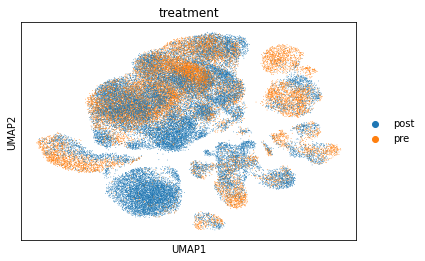

In [19]:
sc.pl.umap(adata2, color='treatment')

## TCR Seq

In [20]:
bcc_tcell_metadata = pd.read_csv('../data/BCC/bcc_tcell_metadata.txt', sep='\t', index_col=0)
bcc_tcell_metadata

,patient,treatment,cluster,UMAP1,UMAP2
cell.id,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD8_mem,7.621735,1.220029
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,Tfh,-3.826207,-2.074360
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD8_mem,7.182139,1.184734
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD8_mem,7.229568,1.080957
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,Tregs,-5.315876,0.338287
...,...,...,...,...,...
bcc.su012.pre.tcell_TTTGGTTGTAGATTAG,su012,pre,Tregs,-6.709299,-0.328671
bcc.su012.pre.tcell_TTTGGTTGTCAAGCGA,su012,pre,CD8_mem,6.639210,1.112855
bcc.su012.pre.tcell_TTTGTCAAGAGGACGG,su012,pre,CD8_mem,6.311589,0.403260


In [21]:
bcc_tcr = pd.read_csv('../data/BCC/bcc_tcr.txt', sep='\t', index_col=0)
bcc_tcr.index.name = 'cell.id'
bcc_tcr

,cdr3s_nt,cdr3s_aa
cell.id,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,TRB:TGCGCCAGCCGCCTAGCGGGGGGGCTCCAAGAGACCCAGTACTTC,TRB:CASRLAGGLQETQYF
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,TRA:TGTGCAGAGACTATTTTGTACAGCAGTGCTTCCAAGATAATC...,TRA:CAETILYSSASKIIF;TRB:CAWTTPGTSNSPLHF
bcc.su001.pre.tcell_AAAGATGAGACAGGCT,TRA:TGCATCGTCAGTCTTTCTCTTGTGATTTATAACCAGGGAGGA...,TRA:CIVSLSLVIYNQGGKLIF;TRB:CASSSSWEGSPGEQYF
bcc.su001.pre.tcell_AAAGATGCACAAGCCC,TRA:TGTGCTGTGGAGCGAAATACTGGAGGCTTCAAAACTATCTTT...,TRA:CAVERNTGGFKTIF;TRB:CASSQLGNGNQPQHF
bcc.su001.pre.tcell_AAAGATGTCTGAGTGT,TRA:TGTGCTGGGGGGAATTATGGTGGTGCTACAAACAAGCTCATC...,TRA:CAGGNYGGATNKLIF;TRB:CASSLPGARVAFF
...,...,...
bcc.su012.post.tcell_TTTGCGCGTCTTTCAT,TRB:TGTGCCAGCAGCTTGCGACAGGGAGCTGGCAGCAATCAGCCC...,TRB:CASSLRQGAGSNQPQHF
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA,TRA:TGTGCAGCAAGTGAAAACTACAAGCTCAGCTTT;TRB:TGTG...,TRA:CAASENYKLSF;TRB:CASSGEGRYGYTF
bcc.su012.post.tcell_TTTGTCAAGCACCGTC,TRA:TGTGCTGTGAGTACTAATGACATGCGCTTT;TRB:TGTGCCA...,TRA:CAVSTNDMRF;TRB:CASSPIGSYEQYF


All sequences (e.g. TRA + TRB) are saved in one string.
Split sequences into separate columns

In [22]:
bcc_tcr.iloc()[7]['cdr3s_nt']

'TRA:TGTGCTTTCTTTGACAATGACATGCGCTTT;TRB:TGCGCCAGCAGCCCGTGGACAGGATCTGAAGCTTTCTTT'

In [23]:
tcr_cells = []
for idx, row in bcc_tcr.iterrows():
    cell = {'cell.id': row.name,
           'cdr3s_nt': row['cdr3s_nt'],
           'cdr3s_aa': row['cdr3s_aa']}
    
    # Iterate through all nucleotide sequences
    tra_counter = 0
    trb_counter = 0
    for num, seq in enumerate(row['cdr3s_nt'].split(';')):
        if 'TRA:' in seq:
            cell[f'cdr3_nt_alpha_{tra_counter}'] = seq.split('TRA:')[1]
            tra_counter += 1
        
        if 'TRB:' in seq:
            cell[f'cdr3_nt_beta_{trb_counter}'] = seq.split('TRB:')[1]
            trb_counter += 1
    
    # Iterate through all amino acid sequences
    tra_aa_counter = 0
    trb_aa_counter = 0
    for num, seq in enumerate(row['cdr3s_aa'].split(';')):
        if 'TRA:' in seq:
            cell[f'cdr3_aa_alpha_{tra_aa_counter}'] = seq.split('TRA:')[1]
            tra_aa_counter += 1
        
        if 'TRB:' in seq:
            cell[f'cdr3_aa_beta_{trb_aa_counter}'] = seq.split('TRB:')[1]
            trb_aa_counter += 1
    tcr_cells.append(cell)

In [24]:
bcc_tcr = pd.DataFrame(tcr_cells).set_index('cell.id')

In [25]:
# Change order of columns
bcc_tcr = bcc_tcr[['cdr3s_nt', 'cdr3s_aa', 
                   'cdr3_nt_alpha_0', 'cdr3_nt_alpha_1', 'cdr3_nt_alpha_2', 'cdr3_nt_alpha_3', 
                   'cdr3_nt_beta_0', 'cdr3_nt_beta_1', 'cdr3_nt_beta_2', 'cdr3_nt_beta_3',
                   'cdr3_aa_alpha_0', 'cdr3_aa_alpha_1', 'cdr3_aa_alpha_2', 'cdr3_aa_alpha_3',
                   'cdr3_aa_beta_0', 'cdr3_aa_beta_1', 'cdr3_aa_beta_2', 'cdr3_aa_beta_3']]

In [26]:
bcc_tcr.head()

,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,cdr3_nt_alpha_3,cdr3_nt_beta_0,cdr3_nt_beta_1,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,
bcc.su001.pre.tcell_AAACCTGCAGATCGGA,TRB:TGCGCCAGCCGCCTAGCGGGGGGGCTCCAAGAGACCCAGTACTTC,TRB:CASRLAGGLQETQYF,NaN,NaN,NaN,NaN,TGCGCCAGCCGCCTAGCGGGGGGGCTCCAAGAGACCCAGTACTTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASRLAGGLQETQYF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAACGGGTCATAGCAC,TRA:TGTGCAGAGACTATTTTGTACAGCAGTGCTTCCAAGATAATC...,TRA:CAETILYSSASKIIF;TRB:CAWTTPGTSNSPLHF,TGTGCAGAGACTATTTTGTACAGCAGTGCTTCCAAGATAATCTTT,NaN,NaN,NaN,TGTGCCTGGACCACCCCCGGGACCAGTAATTCACCCCTCCACTTT,NaN,NaN,NaN,CAETILYSSASKIIF,NaN,NaN,NaN,CAWTTPGTSNSPLHF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAAGATGAGACAGGCT,TRA:TGCATCGTCAGTCTTTCTCTTGTGATTTATAACCAGGGAGGA...,TRA:CIVSLSLVIYNQGGKLIF;TRB:CASSSSWEGSPGEQYF,TGCATCGTCAGTCTTTCTCTTGTGATTTATAACCAGGGAGGAAAGC...,NaN,NaN,NaN,TGTGCCAGCAGCTCATCCTGGGAGGGGAGTCCGGGCGAGCAGTACTTC,NaN,NaN,NaN,CIVSLSLVIYNQGGKLIF,NaN,NaN,NaN,CASSSSWEGSPGEQYF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAAGATGCACAAGCCC,TRA:TGTGCTGTGGAGCGAAATACTGGAGGCTTCAAAACTATCTTT...,TRA:CAVERNTGGFKTIF;TRB:CASSQLGNGNQPQHF,TGTGCTGTGGAGCGAAATACTGGAGGCTTCAAAACTATCTTT,NaN,NaN,NaN,TGTGCCAGCAGCCAATTGGGGAATGGCAATCAGCCCCAGCATTTT,NaN,NaN,NaN,CAVERNTGGFKTIF,NaN,NaN,NaN,CASSQLGNGNQPQHF,NaN,NaN,NaN
bcc.su001.pre.tcell_AAAGATGTCTGAGTGT,TRA:TGTGCTGGGGGGAATTATGGTGGTGCTACAAACAAGCTCATC...,TRA:CAGGNYGGATNKLIF;TRB:CASSLPGARVAFF,TGTGCTGGGGGGAATTATGGTGGTGCTACAAACAAGCTCATCTTT,NaN,NaN,NaN,TGTGCCAGCAGTTTGCCGGGGGCCCGGGTGGCTTTCTTT,NaN,NaN,NaN,CAGGNYGGATNKLIF,NaN,NaN,NaN,CASSLPGARVAFF,NaN,NaN,NaN


In [27]:
# Calculate number of Dual alpha IRs
len(bcc_tcr) - bcc_tcr['cdr3_nt_alpha_1'].isnull().sum()

1507

In [28]:
# Calculate number of Multichain IRs
len(bcc_tcr) - bcc_tcr['cdr3_nt_alpha_2'].isnull().sum()

50

In [29]:
bcc_tcr_joined = pd.concat([bcc_tcell_metadata, bcc_tcr], axis=1)
bcc_tcr_joined.to_pickle('../data/BCC/bcc_tcr_raw.pkl')
bcc_tcr_joined

,patient,treatment,cluster,UMAP1,UMAP2,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,...,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD8_mem,7.621735,1.220029,TRB:TGTGCCAGCAGCTCAGCAGGGGGCTTGAACACTGAAGCTTTC...,TRB:CASSSAGGLNTEAFF;TRB:CAWSVGPSSQGRYEQYF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSSAGGLNTEAFF,CAWSVGPSSQGRYEQYF,NaN,NaN
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,Tfh,-3.826207,-2.074360,TRB:TGTGCCAGCAGCGTAGAAATAGGGATCGGCTACACCTTC,TRB:CASSVEIGIGYTF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSVEIGIGYTF,NaN,NaN,NaN
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD8_mem,7.182139,1.184734,TRB:TGTGCCAGCAGCCTTAGCGGGGGGAGCTCCTACAATGAGCAG...,TRB:CASSLSGGSSYNEQFF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSLSGGSSYNEQFF,NaN,NaN,NaN
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD8_mem,7.229568,1.080957,TRB:TGTGCCAGCAGCTTAGACCACGGGACAGGGGGCTTTAACACC...,TRB:CASSLDHGTGGFNTGELFF,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CASSLDHGTGGFNTGELFF,NaN,NaN,NaN
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,Tregs,-5.315876,0.338287,TRA:TGTGCAGATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,TRA:CADAGGTSYGKLTF,TGTGCAGATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,NaN,NaN,...,NaN,NaN,CADAGGTSYGKLTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bcc.su012.pre.tcell_CGTCTACAGGTGCTAG,NaN,NaN,NaN,NaN,NaN,TRA:TGTGCTGTGAGAGAAACTGGGGCAAACAACCTCTTCTTT;TR...,TRA:CAVRETGANNLFF;TRB:CASSTGQGAGQPQHF,TGTGCTGTGAGAGAAACTGGGGCAAACAACCTCTTCTTT,NaN,NaN,...,NaN,NaN,CAVRETGANNLFF,NaN,NaN,NaN,CASSTGQGAGQPQHF,NaN,NaN,NaN
bcc.su012.pre.tcell_GACGCGTTCTCAACTT,NaN,NaN,NaN,NaN,NaN,TRA:TGTGCTGTGGGAAACACCAATGCAGGCAAATCAACCTTT;TR...,TRA:CAVGNTNAGKSTF;TRB:CASSEGVRTKYF,TGTGCTGTGGGAAACACCAATGCAGGCAAATCAACCTTT,NaN,NaN,...,NaN,NaN,CAVGNTNAGKSTF,NaN,NaN,NaN,CASSEGVRTKYF,NaN,NaN,NaN
bcc.su012.pre.tcell_GATGAAAGTACAGTGG,NaN,NaN,NaN,NaN,NaN,TRA:TGCATCGTCAGAGTCGTCTCTACCTCAGGAACCTACAAATAC...,TRA:CIVRVVSTSGTYKYIF;TRB:CASSDISNQPQHF,TGCATCGTCAGAGTCGTCTCTACCTCAGGAACCTACAAATACATCTTT,NaN,NaN,...,NaN,NaN,CIVRVVSTSGTYKYIF,NaN,NaN,NaN,CASSDISNQPQHF,NaN,NaN,NaN


In [30]:
# Show cells with 4 beta chains
bcc_tcr_joined[~bcc_tcr_joined['cdr3_aa_beta_3'].isna()]

,patient,treatment,cluster,UMAP1,UMAP2,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,...,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,,,,
bcc.su009.post.tcell_TCAGCAAAGTGCGATG,su009,post,Tfh,-3.948093,-3.062133,TRA:TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT;TR...,TRA:CALVTGSQGNLIF;TRA:CAVDQAGGTSYGKLTF;TRB:CAI...,TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT,TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,NaN,...,TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT,TGTGCCATCAGGGACCAGAACACCGGGGAGCTGTTTTTT,CALVTGSQGNLIF,CAVDQAGGTSYGKLTF,NaN,NaN,CAIRDQNTGELFF,CASSLAGTSPSNEQFF,CASSQGSGPAGELFF,CSIWTGLNTEAFF
bcc.su009.post.tcell_TGTGGTATCATCGATG,su009,post,Naive,2.635549,2.212065,TRA:TGTGCTGTGAGCCCTGACACGGGCAGGAGAGCACTTACTTTT...,TRA:CAVSPDTGRRALTF;TRA:CAYNYAGNNRKLIW;TRA:CGAL...,TGTGCTGTGAGCCCTGACACGGGCAGGAGAGCACTTACTTTT,TGTGCTTATAACTATGCTGGCAACAACCGTAAGCTGATTTGG,TGTGGAGCATTAATCTCTGGTTCTGCAAGGCAACTGACCTTT,...,TGTGCCAGCAGCTTACAGGGGGGGGGAATCACAGATACGCAGTATTTT,TGTGCCAGCAGCTTGTTGGGGACAGGGTTGCAACGACAGTACTTC,CAVSPDTGRRALTF,CAYNYAGNNRKLIW,CGALISGSARQLTF,NaN,CASSLLGTGLQRQYF,CASSLQGGGITDTQYF,CASSQAGTAGVDIQYF,CSATQTSGRLVDTQYF


In [31]:
# Show a sample of cdr3s_nt string with multichain
bcc_tcr_joined[~bcc_tcr_joined['cdr3_aa_beta_3'].isna()].iloc()[0]['cdr3s_nt']

'TRA:TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT;TRA:TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT;TRB:TGCAGCATCTGGACAGGGTTGAACACTGAAGCTTTCTTT;TRB:TGCGCCAGCAGCTTGGCCGGGACTAGTCCAAGCAATGAGCAGTTCTTC;TRB:TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT;TRB:TGTGCCATCAGGGACCAGAACACCGGGGAGCTGTTTTTT'

In [32]:
tcr_cells = []
for idx, row in bcc_tcr_joined.iterrows():
    cell = ir.io.IrCell(cell_id=row.name)
    for i in range(4):  # reversed so the first TRA and TRB will be saved in multichain cells
        if type(row[f'cdr3_aa_alpha_{i}']) is str:
            alpha_chain = ir.io.IrChain(
                locus="TRA",
                cdr3=row[f"cdr3_aa_alpha_{i}"],
                cdr3_nt=row[f"cdr3_nt_alpha_{i}"],
                expr=0,
                is_productive=True
            )
            cell.add_chain(alpha_chain)

        if type(row[f'cdr3_aa_beta_{i}']) is str:
            beta_chain = ir.io.IrChain(
                locus="TRB",
                cdr3=row[f"cdr3_aa_beta_{i}"],
                cdr3_nt=row[f"cdr3_nt_beta_{i}"],
                expr=0,
                is_productive=True
            )
            cell.add_chain(beta_chain)
    tcr_cells.append(cell)


In [33]:
tcr_cells

[IrCell bcc.su001.post.tcell_AAACCTGAGCTTCGCG with 2 chains,
 IrCell bcc.su001.post.tcell_AAACCTGAGGACATTA with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCACGCATCG with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCAGATGGGT with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCAGTGGAGT with 1 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCATGCCTTC with 3 chains,
 IrCell bcc.su001.post.tcell_AAACCTGCATTGCGGC with 0 chains,
 IrCell bcc.su001.post.tcell_AAACCTGGTTATCACG with 2 chains,
 IrCell bcc.su001.post.tcell_AAACCTGTCACCCGAG with 3 chains,
 IrCell bcc.su001.post.tcell_AAACCTGTCAGGTTCA with 1 chains,
 IrCell bcc.su001.post.tcell_AAACGGGCACGAAATA with 2 chains,
 IrCell bcc.su001.post.tcell_AAACGGGCAGATCGGA with 3 chains,
 IrCell bcc.su001.post.tcell_AAACGGGGTAAATACG with 1 chains,
 IrCell bcc.su001.post.tcell_AAACGGGGTTGTACAC with 2 chains,
 IrCell bcc.su001.post.tcell_AAACGGGGTTGTCTTT with 1 chains,
 IrCell bcc.su001.post.tcell_AAACGGGTCAGCTCTC with 2 chains,
 IrCell bcc.su001.post.t

In [34]:
adata_tcr = ir.io.from_ir_objs(tcr_cells)
adata_tcr.write('../data/BCC/bcc_tcr_scirpy.h5ad')

... storing 'multi_chain' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical


In [35]:
pd.options.display.max_columns = None
adata_tcr.obs.head(20)

,multi_chain,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,IR_VDJ_1_cdr3_nt,IR_VDJ_2_cdr3_nt,IR_VJ_1_expr,IR_VJ_2_expr,IR_VDJ_1_expr,IR_VDJ_2_expr,IR_VJ_1_expr_raw,IR_VJ_2_expr_raw,IR_VDJ_1_expr_raw,IR_VDJ_2_expr_raw,IR_VJ_1_v_gene,IR_VJ_2_v_gene,IR_VDJ_1_v_gene,IR_VDJ_2_v_gene,IR_VJ_1_d_gene,IR_VJ_2_d_gene,IR_VDJ_1_d_gene,IR_VDJ_2_d_gene,IR_VJ_1_j_gene,IR_VJ_2_j_gene,IR_VDJ_1_j_gene,IR_VDJ_2_j_gene,IR_VJ_1_c_gene,IR_VJ_2_c_gene,IR_VDJ_1_c_gene,IR_VDJ_2_c_gene,IR_VJ_1_junction_ins,IR_VJ_2_junction_ins,IR_VDJ_1_junction_ins,IR_VDJ_2_junction_ins,has_ir
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,False,NaN,NaN,TRB,TRB,None,None,CAWSVGPSSQGRYEQYF,CASSSAGGLNTEAFF,None,None,TGTGCCTGGAGTGTAGGGCCCTCCTCACAGGGGCGCTACGAGCAGT...,TGTGCCAGCAGCTCAGCAGGGGGCTTGAACACTGAAGCTTTCTTT,NaN,NaN,0.0,0.0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGAGGACATTA,False,NaN,NaN,TRB,NaN,None,None,CASSVEIGIGYTF,None,None,None,TGTGCCAGCAGCGTAGAAATAGGGATCGGCTACACCTTC,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCACGCATCG,False,NaN,NaN,TRB,NaN,None,None,CASSLSGGSSYNEQFF,None,None,None,TGTGCCAGCAGCCTTAGCGGGGGGAGCTCCTACAATGAGCAGTTCTTC,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCAGATGGGT,False,NaN,NaN,TRB,NaN,None,None,CASSLDHGTGGFNTGELFF,None,None,None,TGTGCCAGCAGCTTAGACCACGGGACAGGGGGCTTTAACACCGGGG...,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,False,TRA,NaN,NaN,NaN,CADAGGTSYGKLTF,None,None,None,TGTGCAGATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT,None,None,None,0.0,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCATGCCTTC,False,TRA,TRA,TRB,NaN,CAVWGSSNTGKLIF,CAMRVPNQGGKLIF,CAISELGGATRTGELFF,None,TGTGCTGTCTGGGGCTCTAGCAACACAGGCAAACTAATCTTT,TGTGCAATGAGAGTGCCCAACCAGGGAGGAAAGCTTATCTTC,TGTGCCATCAGTGAGTTAGGAGGGGCCACAAGGACCGGGGAGCTGT...,None,0.0,0.0,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGCATTGCGGC,nan,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False
bcc.su001.post.tcell_AAACCTGGTTATCACG,False,TRA,NaN,TRB,NaN,CAVNDKGSARQLTF,None,CASSQENGRVAEAFF,None,TGTGCCGTGAATGATAAAGGTTCTGCAAGGCAACTGACCTTT,None,TGCGCCAGCAGCCAAGAAAATGGACGGGTCGCTGAAGCTTTCTTT,None,0.0,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
bcc.su001.post.tcell_AAACCTGTCACCCGAG,False,TRA,TRA,TRB,NaN,CAVRDDRNNNARLMF,CAGAKGGSYIPTF,CASSETSGGPWDEQFF,None,TGTGCAGGAGCGAAAGGAGGAAGCTACATACCTACATTT,TGCGCTGTGAGAGATGATAGAAATAACAATGCCAGACTCATGTTT,TGTGCCAGCAGTGAAACTAGCGGGGGGCCCTGGGATGAGCAGTTCTTC,None,0.0,0.0,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True


In [36]:
bcc_tcr_joined.loc['bcc.su009.post.tcell_TCAGCAAAGTGCGATG']

patient                                                        su009
treatment                                                       post
cluster                                                          Tfh
UMAP1                                                      -3.948093
UMAP2                                                      -3.062133
cdr3s_nt           TRA:TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT;TR...
cdr3s_aa           TRA:CALVTGSQGNLIF;TRA:CAVDQAGGTSYGKLTF;TRB:CAI...
cdr3_nt_alpha_0              TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT
cdr3_nt_alpha_1     TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
cdr3_nt_alpha_2                                                  NaN
cdr3_nt_alpha_3                                                  NaN
cdr3_nt_beta_0               TGCAGCATCTGGACAGGGTTGAACACTGAAGCTTTCTTT
cdr3_nt_beta_1      TGCGCCAGCAGCTTGGCCGGGACTAGTCCAAGCAATGAGCAGTTCTTC
cdr3_nt_beta_2         TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT
cdr3_nt_beta_3               TGTGC

In [37]:
adata_tcr.obs.loc['bcc.su009.post.tcell_TCAGCAAAGTGCGATG']

multi_chain                                                          True
IR_VJ_1_locus                                                         TRA
IR_VJ_2_locus                                                         TRA
IR_VDJ_1_locus                                                        TRB
IR_VDJ_2_locus                                                        TRB
IR_VJ_1_cdr3                                             CAVDQAGGTSYGKLTF
IR_VJ_2_cdr3                                                CALVTGSQGNLIF
IR_VDJ_1_cdr3                                               CSIWTGLNTEAFF
IR_VDJ_2_cdr3                                             CASSQGSGPAGELFF
IR_VJ_1_cdr3_nt          TGTGCTGTGGATCAAGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
IR_VJ_2_cdr3_nt                   TGTGCACTAGTTACGGGAAGCCAAGGAAATCTCATCTTT
IR_VDJ_1_cdr3_nt                  TGTGCCATCAGGGACCAGAACACCGGGGAGCTGTTTTTT
IR_VDJ_2_cdr3_nt            TGTGCCAGCAGCCAAGGGTCAGGGCCGGCCGGGGAGCTGTTTTTT
IR_VJ_1_expr                          

Join TCR with gene expression data

In [38]:
adata_tcr

AnnData object with n_obs × n_vars = 33143 × 0
    obs: 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir'

In [39]:
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2'

In [40]:
ir.pp.merge_with_ir(adata, adata_tcr)

In [41]:
# adata after merging
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain'

In [42]:
# Add tcr metadata such as tcr_cluster to whole dataset
adata.obs = adata.obs.join(bcc_tcell_metadata, rsuffix='_tcr')

In [43]:
adata

AnnData object with n_obs × n_vars = 53030 × 23309
    obs: 'patient', 'treatment', 'sort', 'cluster', 'UMAP1', 'UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'patient_tcr', 'treatment_tcr', 'cluster_tcr', 'UMAP1_tcr', 'UMAP2_tcr'

In [44]:
adata.write('../data/BCC/bcc_tcr_and_gene.h5ad')

... storing 'patient_tcr' as categorical
... storing 'treatment_tcr' as categorical
... storing 'cluster_tcr' as categorical


#### UMAP of tcr metadata

In [45]:
adata_test = anndata.AnnData(obs=bcc_tcell_metadata)
adata_test.obsm['umap'] = bcc_tcell_metadata[['UMAP1', 'UMAP2']].values

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'cluster' as categorical


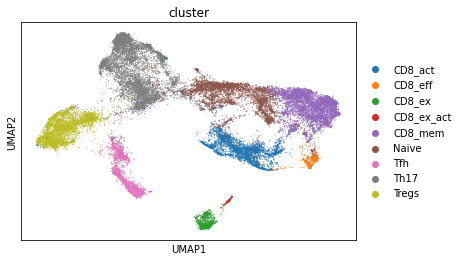

In [46]:
sc.pl.umap(adata_test, color='cluster')

## Sanity Check
Check if 'patient', 'treatment' and 'cluster' values in 'bcc_all_metadata.txt' and 'bcc_tcell_metadata' are aligned

In [47]:
bcc_all_metadata = pd.read_csv('../data/BCC/bcc_all_metadata.txt', sep='\t', index_col=0)
bcc_all_metadata.head()

,patient,treatment,sort,cluster,UMAP1,UMAP2
cell.id,,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-8.491220,5.533525
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,CD45+ CD3+,CD8_ex_T_cells,4.623724,6.668594
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.920441,3.196553
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD45+ CD3+,CD8_mem_T_cells,-7.878223,4.333302
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,CD45+ CD3+,Tregs,-2.382094,11.260816


In [48]:
bcc_tcell_metadata = pd.read_csv('../data/BCC/bcc_tcell_metadata.txt', sep='\t', index_col=0)
bcc_tcell_metadata.head()

,patient,treatment,cluster,UMAP1,UMAP2
cell.id,,,,,
bcc.su001.post.tcell_AAACCTGAGCTTCGCG,su001,post,CD8_mem,7.621735,1.220029
bcc.su001.post.tcell_AAACCTGAGGACATTA,su001,post,Tfh,-3.826207,-2.074360
bcc.su001.post.tcell_AAACCTGCACGCATCG,su001,post,CD8_mem,7.182139,1.184734
bcc.su001.post.tcell_AAACCTGCAGATGGGT,su001,post,CD8_mem,7.229568,1.080957
bcc.su001.post.tcell_AAACCTGCAGTGGAGT,su001,post,Tregs,-5.315876,0.338287


Cluster values aren't always aligned, some values only exist in either file

In [49]:
bcc_all_metadata.cluster.unique()

array(['CD8_mem_T_cells', 'CD8_ex_T_cells', 'Tregs', 'CD4_T_cells',
       'Tcell_prolif', 'NK_cells', 'B_cells_1', 'CD8_act_T_cells',
       'Macrophages', 'pDCs', 'Plasma_cells', 'DCs', 'CAFs',
       'Endothelial', 'Myofibroblasts', 'B_cells_2', 'Melanocytes',
       'Tumor_1', 'Tumor_2'], dtype=object)

In [50]:
bcc_tcell_metadata.cluster.unique()

array(['CD8_mem', 'Tfh', 'Tregs', 'CD8_ex', 'Th17', 'Naive', 'CD8_eff',
       'CD8_act', 'CD8_ex_act'], dtype=object)

In [51]:
combined_meta = bcc_tcell_metadata.join(bcc_all_metadata, lsuffix='_tcell', rsuffix='_all')#[['cluster_tcell', 'cluster_all']].tail(60)
combined_meta.groupby(['cluster_tcell', 'cluster_all']).size()

cluster_tcell  cluster_all    
CD8_act        CD4_T_cells          86
               CD8_act_T_cells    3639
               CD8_ex_T_cells        1
               CD8_mem_T_cells     130
               Tcell_prolif         19
               Tregs                13
CD8_eff        CD8_act_T_cells      34
               CD8_mem_T_cells     739
               Tcell_prolif          1
               Tregs                 1
CD8_ex         CD4_T_cells           3
               CD8_act_T_cells      15
               CD8_ex_T_cells     1087
               CD8_mem_T_cells      85
               Tcell_prolif         54
               Tregs                20
CD8_ex_act     CD8_act_T_cells     292
               CD8_ex_T_cells        1
               CD8_mem_T_cells       3
               Tcell_prolif          5
               Tregs                 1
CD8_mem        CD4_T_cells          95
               CD8_act_T_cells      52
               CD8_ex_T_cells       20
               CD8_mem_T_cells   

Patient and treatment values are aligned

In [52]:
combined_meta.groupby(['treatment_tcell', 'treatment_all']).size()

treatment_tcell  treatment_all
post             post             19073
pre              pre              14033
dtype: int64

In [53]:
combined_meta.groupby(['patient_tcell', 'patient_all']).size()

patient_tcell  patient_all
su001          su001          4959
su002          su002           274
su003          su003           219
su004          su004           875
su005          su005          3464
su006          su006          3805
su007          su007          1668
su008          su008          4868
su009          su009          9047
su010          su010           626
su012          su012          3301
dtype: int64

# Single cell data preprocessing

Adapted from single cell preprocessing maren?

In [3]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import seaborn as sb
sb.set_style('white')

In [4]:
path_base = '../data/BCC/'
path_merged = path_base + 'bcc_tcr_and_gene.h5ad'
path_filtered = path_base + '02_bcc_filtered_tcr.h5ad'
path_tcr_split = path_base + '03_bcc_train_test_split.h5ad'
path_normalized = path_base + '04_bcc_normalized_tcr.h5ad'
path_logged = path_base + '05_bcc_logged.h5ad'
path_highlyvar = path_base + '06_bcc_highly_var_5000.h5ad'

## Filtering

In [5]:
adata = sc.read_h5ad(path_merged)

In [6]:
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log10(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
mt_gene_index = np.where(mt_gene_mask)[0]
adata.obs['mt_fraction'] = adata.X[:, mt_gene_index].sum(1) / adata.X.sum(1)

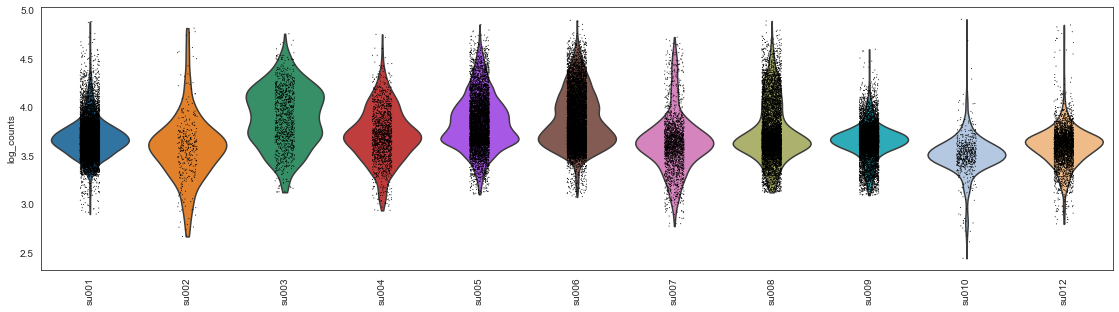

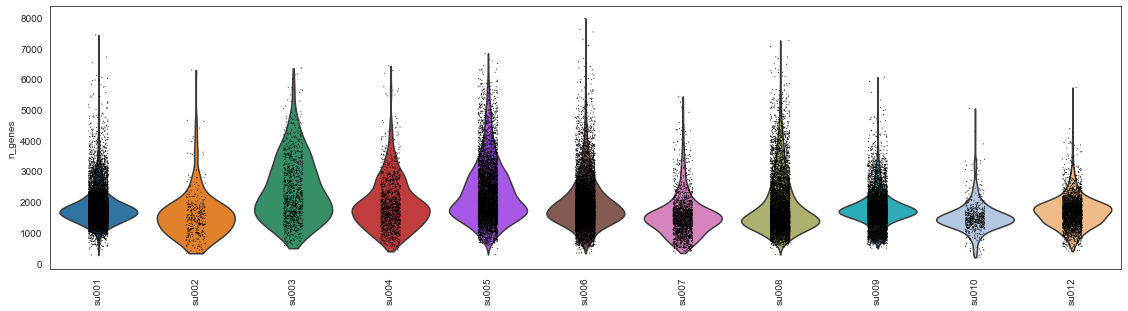

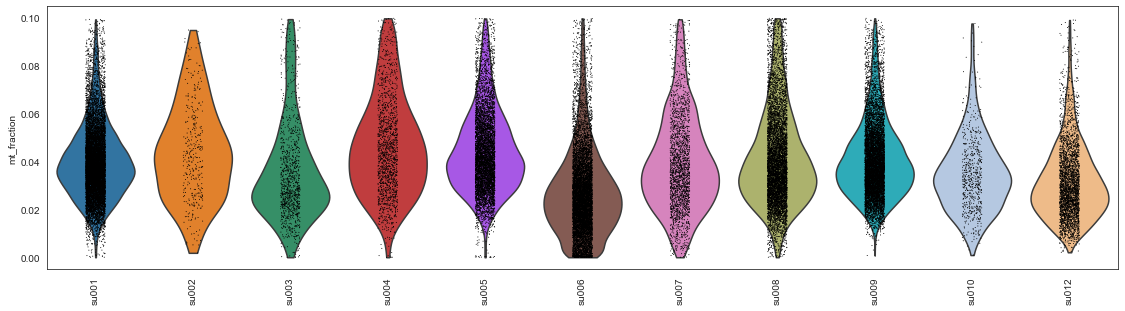

In [7]:
rcParams['figure.figsize'] = (15, 5)
sc.pl.violin(adata, ['log_counts'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['n_genes'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['mt_fraction'], groupby='patient', size=1, log=False, rotation=90)

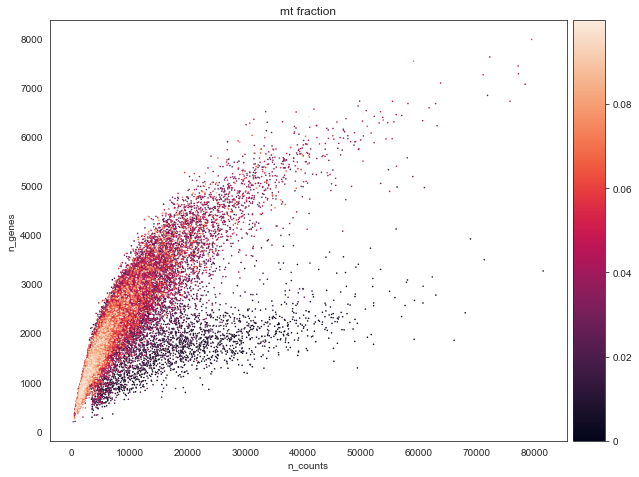

In [8]:
rcParams['figure.figsize'] = (8, 8)
sc.pl.scatter(adata, y='n_genes', x='n_counts', color='mt_fraction', size=10, show=False)

In [9]:
print(f'number of cells: {len(adata)}')
adata = adata[adata.obs['mt_fraction'] < 0.2]
print(f'number of cells after mt filter: {len(adata)}')

number of cells: 53030
number of cells after mt filter: 53030


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [10]:
print(f'number of cells: {len(adata)}')
adata = adata[adata.obs['n_counts'] > 1000]
print(f'number of cells after low count filter: {len(adata)}')
sc.pp.filter_cells(adata, max_counts=10000)
print(f'number of cells after high count filter: {len(adata)}')

number of cells: 53030
number of cells after low count filter: 52923


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


number of cells after high count filter: 44487


In [11]:
print(f'number of cells: {len(adata)}')
adata = adata[adata.obs['n_genes'] > 500]
print(f'number of cells low gene filter: {len(adata)}')

number of cells: 44487
number of cells low gene filter: 44448


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [12]:
print(f'number of genes: {len(adata.var)}')
sc.pp.filter_genes(adata, min_cells=10)
print(f'number of genes after seldom gene filter: {len(adata.var)}')

number of genes: 23309


Trying to set attribute `.var` of view, copying.
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


number of genes after seldom gene filter: 19530


## Doublet detection with scrublet

In [13]:
import scrublet as scr
import scipy.io
import time
import seaborn as sb

In [14]:
adata.obs['doublet_score'] = np.zeros(adata.shape[0])
adata.obs['doublet'] = np.zeros(adata.shape[0])

In [15]:
# filtering / preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 50

# doublet detector parameters
expected_doublet_rate = 0.02
sim_doublet_ratio = 3
n_neighbors = 15

for batch in enumerate(adata.obs['patient'].cat.categories):
    print(batch)
    t0 = time.time()
    idx = np.flatnonzero(adata.obs['patient']==batch[1])
    scrub = scr.Scrublet(counts_matrix = adata[idx, :].X,
                        n_neighbors = n_neighbors,
                        sim_doublet_ratio = sim_doublet_ratio,
                        expected_doublet_rate = expected_doublet_rate)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts = min_counts,
                                                              min_cells = min_cells,
                                                              n_prin_comps = n_pc,
                                                              use_approx_neighbors = True,
                                                              get_doublet_neighbor_parents = False)
    adata.obs['doublet_score'].iloc[idx] = doublet_scores
    adata.obs['doublet'].iloc[idx] = predicted_doublets
    t1 = time.time()
    print('Elapsed time: {:.1f} seconds'.format(t1-t0))

(0, 'su001')
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 46.8%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 1.1%
Elapsed time: 12.3 seconds
Elapsed time: 12.7 seconds
(1, 'su002')
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 27.3%
Elapsed time: 0.3 seconds
Elapsed time: 0.3 seconds
(2, 'su003')
Preprocessing...
Simulating doublets...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 19.5%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 0.0%
Elapsed time: 0.5 seconds
Elapsed time: 0.5 seconds
(3, 'su004')
Preprocessing...
Simulating doublets...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 17.8%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 1.8%
Elapsed time: 1.1 seconds
Elapsed time: 1.2 seconds
(4, 'su005')
Preprocessing...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 41.2%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 0.8%
Elapsed time: 5.2 seconds
Elapsed time: 5.4 seconds
(5, 'su006')


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 51.4%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 0.5%
Elapsed time: 7.0 seconds
Elapsed time: 7.2 seconds
(6, 'su007')
Preprocessing...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 16.1%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 6.8%
Elapsed time: 1.8 seconds
Elapsed time: 1.9 seconds
(7, 'su008')
Preprocessing...

C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)



Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 30.1%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 2.6%
Elapsed time: 6.5 seconds
Elapsed time: 6.7 seconds
(8, 'su009')


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 34.5%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 5.6%
Elapsed time: 9.6 seconds
Elapsed time: 9.9 seconds
(9, 'su010')
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 5.1%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 16.1%
Elapsed time: 0.5 seconds
Elapsed time: 0.5 seconds
(10, 'su012')
Preprocessing...


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 28.8%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 6.0%
Elapsed time: 3.0 seconds
Elapsed time: 3.1 seconds


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='doublet_score'>

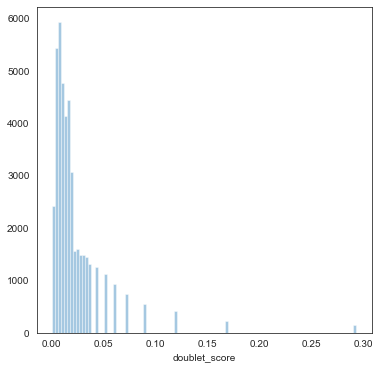

In [16]:
rcParams['figure.figsize'] = (6, 6)
sb.distplot(adata.obs['doublet_score'], bins=100, kde=False)

... storing 'doublet' as categorical


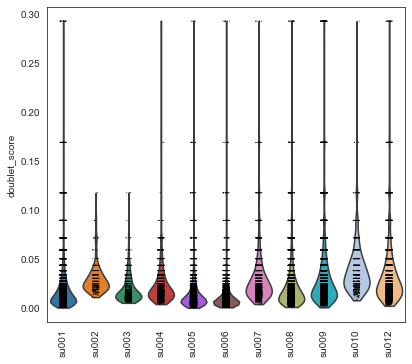

In [17]:
sc.pl.violin(adata, ['doublet_score'], groupby='patient', size=1, log=False, rotation=90)

In [18]:
thr = 0.05
idx_filter = adata.obs['doublet_score'] <= thr

print(f'number of cells: {len(adata)}')
adata = adata[idx_filter].copy()
print(f'Number of cells after double filter: {adata.n_obs}')

number of cells: 44448


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Number of cells after double filter: 40318


QC after filtering

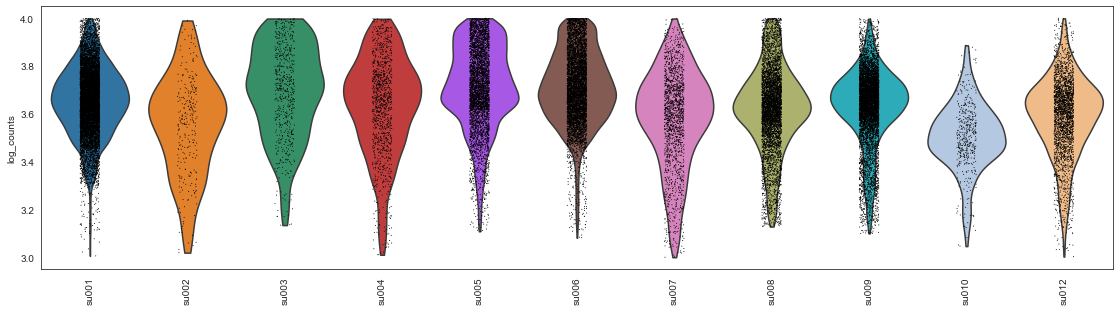

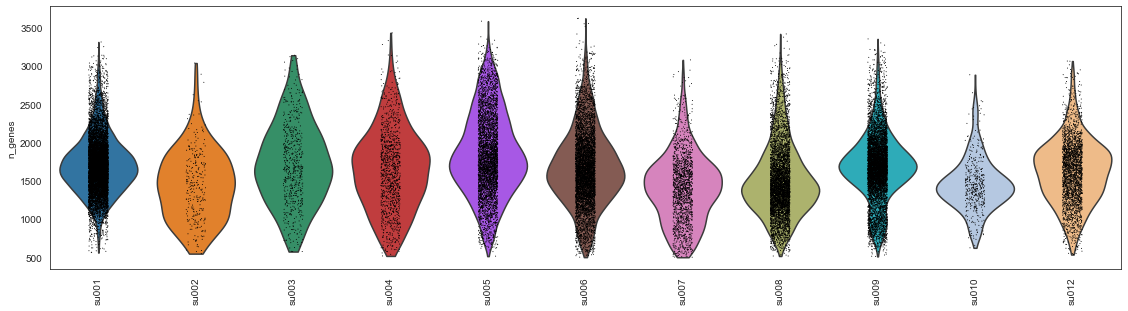

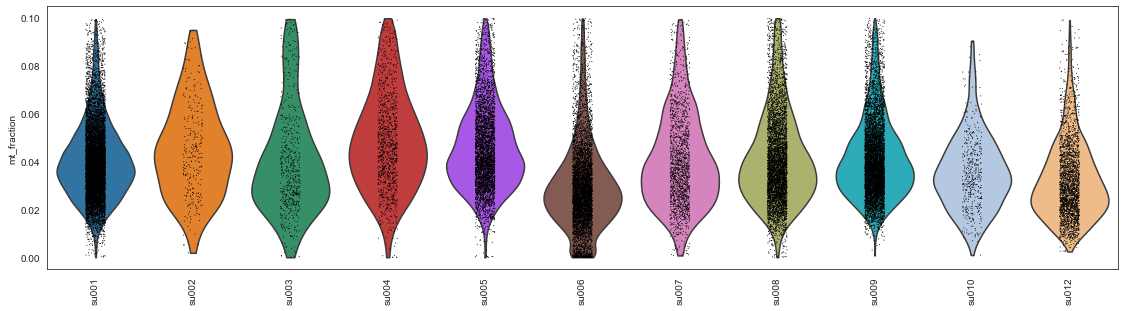

In [19]:
rcParams['figure.figsize'] = (15, 5)
sc.pl.violin(adata, ['log_counts'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['n_genes'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['mt_fraction'], groupby='patient', size=1, log=False, rotation=90)

In [20]:
sc.write(adata=adata, filename=path_filtered)

## Filter cells with productive single IR 

In [8]:
adata = sc.read_h5ad(path_filtered)

In [9]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['has_ir']=='True']
print(f'Number of cells with IR: {adata.n_obs}')

Number of cells: 40318
Number of cells with IR: 23781


C:\Users\felix.drost\Anaconda3\envs\scanpy\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [10]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['multi_chain']=='False']

print(f'Number of cells without >2 chains: {adata.n_obs}')

adata = adata[adata.obs['IR_VJ_2_cdr3']=='None']
adata = adata[adata.obs['IR_VDJ_2_cdr3']=='None']

print(f'Number of cells with =1 per chain: {adata.n_obs}')

Number of cells: 23781
Number of cells without >2 chains: 23764
Number of cells with =1 per chain: 22285


## Filter unpaired Sequences

In [11]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['IR_VDJ_1_cdr3'] != 'None']
print(f'Number of cells with beta chain: {adata.n_obs}')

Number of cells: 22285
Number of cells with beta chain: 21222


In [12]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['IR_VJ_1_cdr3'] != 'None']
print(f'Number of cells with alpha chain: {adata.n_obs}')

Number of cells: 21222
Number of cells with alpha chain: 14582


Sanity check: only a single CDR3alpha and CDR3beta chain is present

In [13]:
def check_invalids(sequence):
    allowed_letters = 'GALMFWKQESPVICYHRNDT'
    for letter in sequence:
        if letter not in allowed_letters:
            return False
    return True

for seq_alpha in adata.obs['IR_VJ_1_cdr3']:
    if not check_invalids(seq_alpha):
        print(seq_alpha)
for seq_beta in adata.obs['IR_VDJ_1_cdr3']:
    if not check_invalids(seq_beta):
        print(seq_beta)

## Filter cells by cluster annotation

The dataset provided cluster annotation (cluster, cluster_tcr and sort) indicating the cell type.

In [14]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['cluster'] != 'Macrophages']
adata.obs['cluster'].cat.remove_unused_categories(inplace=True)
adata.obs['cluster_tcr'].cat.remove_unused_categories(inplace=True)
print(f'Number of cells without macrophages: {adata.n_obs}')
adata = adata[adata.obs['sort'] != 'nan']
adata.obs['sort'].cat.remove_unused_categories(inplace=True)
print(f'Number of cells without nan sort: {adata.n_obs}')

Number of cells: 14582
Number of cells without macrophages: 14581
Number of cells without nan sort: 14450


## Clonotype Annotation

In [15]:
adata.obs['TRA+TRB'] = adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)
clono_dict = {clone: idx for idx, clone in enumerate(adata.obs['TRA+TRB'].unique())}
adata.obs['clonotype'] = adata.obs['TRA+TRB'].map(clono_dict)
print(len(adata.obs['clonotype'].unique()))
adata.obs['clonotype'].value_counts()

Trying to set attribute `.obs` of view, copying.


8564


5916    247
5933     80
7675     72
5910     69
2117     53
       ... 
3963      1
1914      1
8057      1
6008      1
2047      1
Name: clonotype, Length: 8564, dtype: int64

## Embed TR

Append both chains, add start ('<'), stop ('>') and seperator ('+') token. For training purpose IR data might be needed as one hot vector.

In [16]:
import sys
sys.path.append('../')
import tcr_embedding as tcr

In [17]:
adata.obs['TRA+TRB'] = adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)
pad = adata.obs['TRA+TRB'].str.len().max()
pad = int(pad)
pad

40

In [18]:
aa_to_id = {'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13,
            'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}
tcr.utils.aa_encoding(adata, read_col='TRA+TRB', ohe_col='one_hot', label_col='tcr_seq', length_col='seq_len', pad=pad, aa_to_id=aa_to_id, start_end_symbol=True)


In [19]:
print(adata.obsm['tcr_seq'].shape)
print(adata.obsm['one_hot'].shape)
print(adata.uns['aa_to_id'])

(14450, 42)
(14450, 42, 24)
{'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}


In [20]:
max_length_alpha = adata.obs['IR_VJ_1_cdr3'].str.len().max()
max_length_beta = adata.obs['IR_VDJ_1_cdr3'].str.len().max()
max_length = max(max_length_alpha, max_length_beta)

In [21]:
aa_to_id = adata.uns['aa_to_id']
tcr.utils.aa_encoding(adata, read_col='IR_VJ_1_cdr3', label_col='alpha_seq', length_col='alpha_len', pad=max_length, aa_to_id=aa_to_id, start_end_symbol=False)
tcr.utils.aa_encoding(adata, read_col='IR_VDJ_1_cdr3', label_col='beta_seq', length_col='beta_len', pad=max_length, aa_to_id=aa_to_id, start_end_symbol=False)

In [22]:
print(max_length_alpha)
print(max_length_beta)

25
23


## Train-Val-Test Split

In [23]:
adata.obs['patient+treatment'] = adata.obs['patient'].astype(str) + '_' + adata.obs['treatment'].astype(str)
adata.obs['patient+treatment'].sample(10)

cell.id
bcc.su001.pre.tcell_CCTCAGTCATCCGCGA      su001_pre
bcc.su008.post.tcell_GATGAGGAGCCGCCTA    su008_post
bcc.su006.pre.tcell_AGATTGCTCAGTTGAC      su006_pre
bcc.su009.post.tcell_TTAGGCACACGACTCG    su009_post
bcc.su005.post.tcell_ACTATCTAGAGTAATC    su005_post
bcc.su001.post.tcell_CTAGCCTAGTACGATA    su001_post
bcc.su009.pre.tcell_GATCGCGGTCCATCCT      su009_pre
bcc.su012.pre.tcell_TCAGATGTCAACCAAC      su012_pre
bcc.su012.pre.tcell_ACTTACTTCCAAGTAC      su012_pre
bcc.su001.post.tcell_TACTTACAGGGAAACA    su001_post
Name: patient+treatment, dtype: object

In [24]:
random_seed = 15
# Create Train-Val and Test set
train_val, test = tcr.utils.stratified_group_shuffle_split(adata.obs, stratify_col='patient+treatment', group_col='clonotype', val_split=0.20, random_seed=random_seed)
# Split Train-Val into Train and Val set
train, val = tcr.utils.stratified_group_shuffle_split(train_val, stratify_col='patient+treatment', group_col='clonotype', val_split=0.25, random_seed=random_seed)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 74.79it/s]


In [25]:
print('Train Samples: ', len(train))
print('Train Ratio: ', len(train) / len(adata.obs))
print('Val Samples: ', len(val))
print('Val Ratio: ', len(val) / len(adata.obs))
print('Test Samples: ', len(test))
print('Test Ratio: ', len(test) / len(adata.obs))

Train Samples:  8857
Train Ratio:  0.6129411764705882
Val Samples:  2635
Val Ratio:  0.18235294117647058
Test Samples:  2958
Test Ratio:  0.20470588235294118


### Visualize Distribution

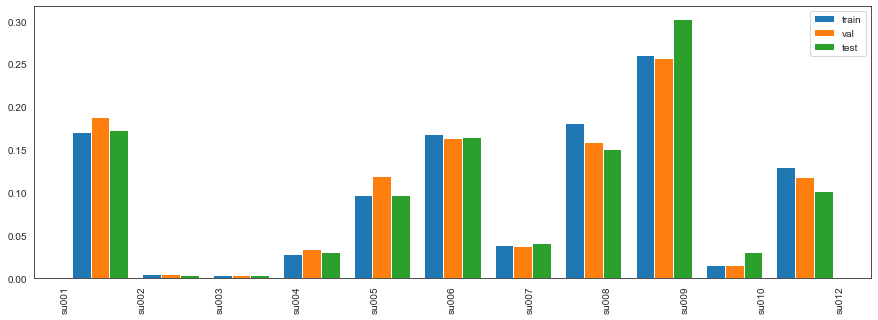

In [26]:
pl.figure(figsize=(15,5))
pl.hist([train['patient'], val['patient'], test['patient']], density=True, bins=len(train['patient'].unique()), label=['train', 'val', 'test'])
pl.xticks(rotation='vertical')
pl.legend(loc='upper right')
pl.show()

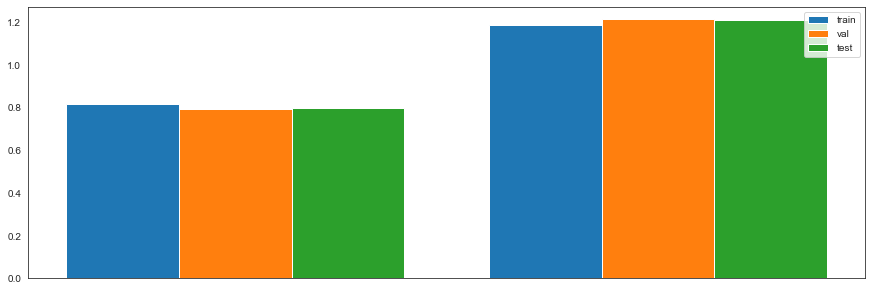

In [27]:
pl.figure(figsize=(15,5))
pl.hist([train['treatment'], val['treatment'], test['treatment']], density=True, bins=len(train['treatment'].unique()), label=['train', 'val', 'test'])
pl.xticks(rotation='vertical')
pl.legend(loc='upper right')
pl.show()

In [28]:
adata.obs.loc[train.index, 'set'] = 'train'
adata.obs.loc[val.index, 'set'] = 'val'
adata.obs.loc[test.index, 'set'] = 'test'
adata.obs['set'].value_counts()

train    8857
test     2958
val      2635
Name: set, dtype: int64

## Add response information

The Yost paper specifies whether the treatment of a patient had a response or not. (Suppl. Material BioRxiv, tables)

In [29]:
patients_response = ['su001', 'su002', 'su003', 'su004', 'su009', 'su012']
patient_non_response = [patient for patient in adata.obs['patient'].unique().tolist() if patient not in patients_response]
patient_non_response

['su005', 'su006', 'su007', 'su008', 'su010']

In [31]:
response = ['responsive' if patient in patients_response else 'non-responsive' for patient in adata.obs['patient']]
adata.obs['response'] = response
response_bin = [True if resp == 'responsive' else False for resp in response]
print(f'Amount Response cells: {sum(response_bin)}')
print(f'Amount non Response cells: {len(response_bin)-sum(response_bin)}')

Amount Response cells: 7926
Amount non Response cells: 6524


In [32]:
adata.write_h5ad(path_tcr_split, compression='gzip')

... storing 'TRA+TRB' as categorical
... storing 'one_hot' as categorical
... storing 'tcr_seq' as categorical
... storing 'alpha_seq' as categorical
... storing 'beta_seq' as categorical
... storing 'patient+treatment' as categorical
... storing 'set' as categorical
... storing 'response' as categorical


## Normalization + Log1p

In [33]:
adata = sc.read_h5ad(path_tcr_split)

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.write(adata=adata, filename=path_normalized)

In [35]:
sc.pp.log1p(adata)
sc.write(adata=adata, filename=path_logged)

## Highly Variable Genes

In [36]:
adata = sc.read_h5ad(path_logged) # todo

In [37]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000, batch_key='patient')
print('Shape before: ', adata.shape)
adata = adata[:, adata.var['highly_variable']]
print('Shape after: ', adata.shape)

Shape before:  (14450, 19530)
Shape after:  (14450, 5000)


In [38]:
sc.write(adata=adata, filename=path_highlyvar)

# Analysis

In [39]:
adata = sc.read_h5ad(path_highlyvar)

In [40]:
adata.obs['treatment']

cell.id
bcc.su001.pre.tcell_AAACGGGTCATAGCAC      pre
bcc.su001.pre.tcell_AAAGATGAGACAGGCT      pre
bcc.su001.pre.tcell_AAAGATGCACAAGCCC      pre
bcc.su001.pre.tcell_AAAGATGTCTGAGTGT      pre
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC      pre
                                         ... 
bcc.su012.post.tcell_TTTACTGAGCTCCTTC    post
bcc.su012.post.tcell_TTTATGCCATATGGTC    post
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA    post
bcc.su012.post.tcell_TTTGTCAAGCACCGTC    post
bcc.su012.post.tcell_TTTGTCAGTCCCTTGT    post
Name: treatment, Length: 14450, dtype: category
Categories (2, object): ['post', 'pre']

## UMAPS

In [5]:
adata = sc.read_h5ad(path_highlyvar)

In [7]:
adata.obs['response']

cell.id
bcc.su001.pre.tcell_AAACGGGTCATAGCAC     True
bcc.su001.pre.tcell_AAAGATGAGACAGGCT     True
bcc.su001.pre.tcell_AAAGATGCACAAGCCC     True
bcc.su001.pre.tcell_AAAGATGTCTGAGTGT     True
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC     True
                                         ... 
bcc.su012.post.tcell_TTTACTGAGCTCCTTC    True
bcc.su012.post.tcell_TTTATGCCATATGGTC    True
bcc.su012.post.tcell_TTTGGTTCAGCCAGAA    True
bcc.su012.post.tcell_TTTGTCAAGCACCGTC    True
bcc.su012.post.tcell_TTTGTCAGTCCCTTGT    True
Name: response, Length: 14450, dtype: bool

In [51]:
def add_combination(adata, obs_1, obs_2):
    obs_joint = [x + '+' + y for x, y in zip(adata.obs[obs_2], adata.obs[obs_1])]
    adata.obs[obs_2 + '+' + obs_1] = obs_joint

In [52]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

add_combination(adata, 'patient', 'treatment')
add_combination(adata, 'cluster', 'treatment')
add_combination(adata, 'cluster_tcr', 'treatment')
add_combination(adata, 'response', 'condition')

groups = ['patient', 'treatment', 'cluster', 'cluster_tcr', 'response', 
          'treatment+patient', 'treatment+cluster', 'treatment+cluster_tcr', 'condition+response']
for col in groups:
    sc.pl.umap(adata, color=col)

         Falling back to preprocessing with `sc.pp.pca` and default params.


KeyError: 'condition'

In [ ]:
columns = ['patient', 'cluster']
new_column = [x for x in adata.obs[columns].iterrows()]
new_column

## Lost cells per filtering step

In [50]:
cells_per_step = {
    '01_original': 53030,
    '02_mt-filter <0.2': 53030,
    '03_low_count >1000': 52923,
    '04_high_count <10000': 44487,
    '05_n_genes > 500': 44448,
    '06_doublet < 0.05': 40318,
    '07_has_ir': 23781,
    '08_!multi_chain': 23764,
    '09_no_double_receptor': 22285,
    '10_beta_chain': 21222,
    '11_alpha_chain': 14582,
    '12_wo_nan_macro': 14450
}

[Text(0, 0, '01_original'),
 Text(1, 0, '02_mt-filter <0.2'),
 Text(2, 0, '03_low_count >1000'),
 Text(3, 0, '04_high_count <10000'),
 Text(4, 0, '05_n_genes > 500'),
 Text(5, 0, '06_doublet < 0.05'),
 Text(6, 0, '07_has_ir'),
 Text(7, 0, '08_!multi_chain'),
 Text(8, 0, '09_no_double_receptor'),
 Text(9, 0, '10_beta_chain'),
 Text(10, 0, '11_alpha_chain'),
 Text(11, 0, '12_wo_nan_macro')]

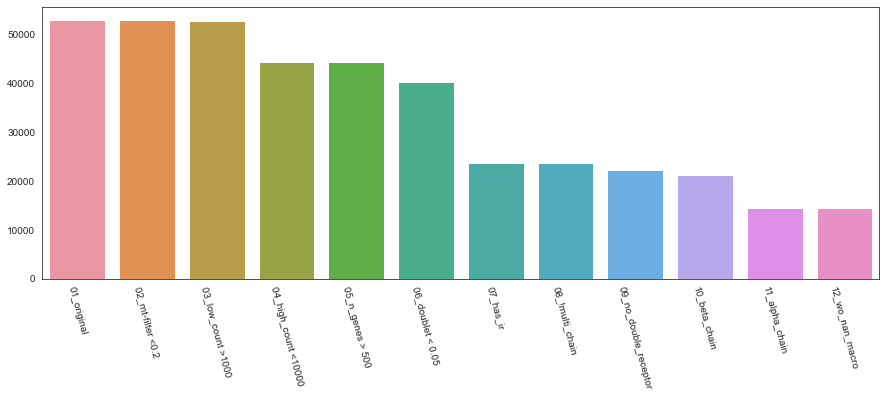

In [51]:
keys = list(cells_per_step.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(cells_per_step[k]) for k in keys]
plot_filter = sb.barplot(x=keys, y=vals)
plot_filter.set_xticklabels(keys, rotation=-75)

## Cell types per donor

In [65]:
adata = sc.read_h5ad(path_batch_corrected)

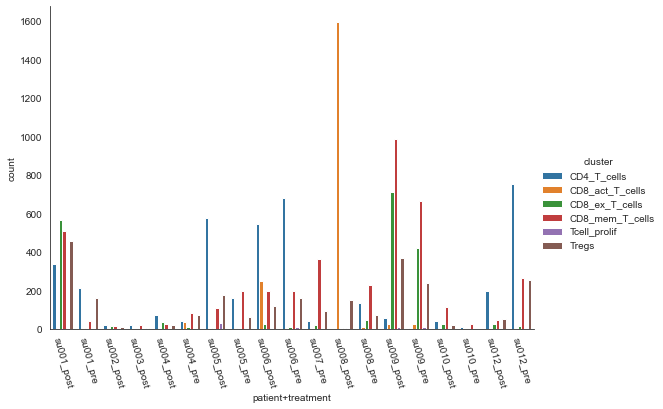

In [87]:
rcParams['figure.figsize'] = (8, 15)
plot_cells = sb.catplot(x='patient+treatment', kind='count', hue='cluster', data=adata.obs, height=5, aspect=1.5)
plot_cells.set_xticklabels(rotation=-75)